In [46]:
import pandas as pd
import numpy as np
df = pd.read_csv("BostonHousing.csv")

In [47]:
# df.head()

In [48]:
# targer and feature
x = df.iloc[: , [5,12]]
y = df.iloc[ : , 13]

In [49]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

In [51]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
m = Sequential()

In [52]:
# help(m)
import keras
m.add(keras.Input(shape=(2,)))
m.add(Dense(8))
m.add(Dense(1))
m.compile(optimizer = 'Adam', loss='mean_squared_error', metrics = ['mean_absolute_error'])

In [53]:
# m.summary()

In [54]:
m.fit(xtrain, ytrain, epochs=100, batch_size=3, validation_data= [xtest, ytest])

Epoch 1/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 584.8918 - mean_absolute_error: 22.5966 - val_loss: 499.3730 - val_mean_absolute_error: 20.8300
Epoch 2/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 524.4208 - mean_absolute_error: 21.3497 - val_loss: 455.9958 - val_mean_absolute_error: 19.9720
Epoch 3/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 496.9102 - mean_absolute_error: 20.8223 - val_loss: 402.6532 - val_mean_absolute_error: 18.8132
Epoch 4/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 422.5982 - mean_absolute_error: 19.2382 - val_loss: 341.1036 - val_mean_absolute_error: 17.3132
Epoch 5/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 389.4645 - mean_absolute_error: 18.3822 - val_loss: 275.6340 - val_mean_absolute_error: 15.4839
Epoch 6/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 313.4746 - mean_absolute_error: 16.4319 - val_loss: 211.1558 - val_mean_absolute_error: 13.3747
Epoch 7/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

In [55]:
ypred = m.predict(xtest)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(ypred, ytest)
mae

4.315630814608405

C:\Users\buoyn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medv'>

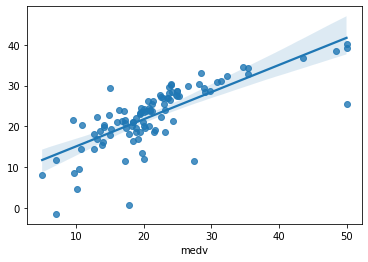

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# help(sns.regplot)
sns.regplot(ytest, ypred)